In [28]:
! kaggle datasets download -d uciml/iris --unzip

Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0




  0%|          | 0.00/3.60k [00:00<?, ?B/s]
100%|██████████| 3.60k/3.60k [00:00<00:00, 3.81MB/s]


In [29]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# import the dataset
df = pd.read_csv('Iris.csv')

In [31]:
# display the first 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
# check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [33]:
# not a lot of data.. only 150 rows... lets just build a model anyways and see the importance of having a large amount of data

# lets drop the id column
df.drop('Id', axis=1, inplace=True)



In [34]:
# lets just check out teh value distrabution for all the features

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

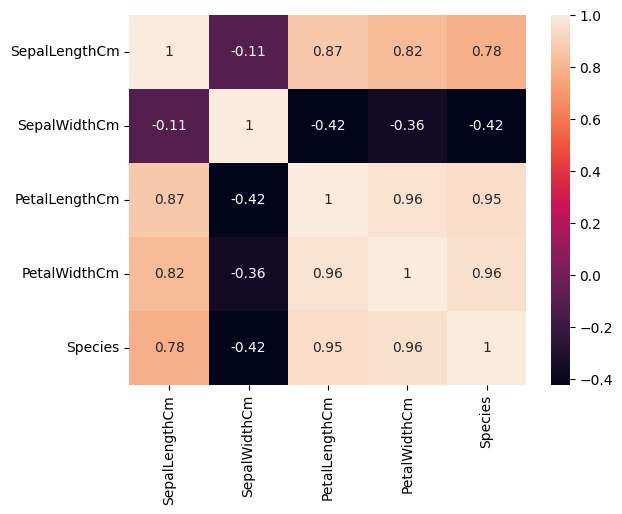

In [35]:
# data does not need to be normalized 

# Lets change the target var to int 
df['Species'] = df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# lets check the correlation between the features
sns.heatmap(df.corr(), annot=True)

In [36]:
#Very high corralation between petal length, petal width, and species; sepal width and species have a low correlation but lets keep it and see what happens 

# lets split the data into features and target
y = df['Species']
X = df.drop('Species', axis=1)




In [38]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [39]:
#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# check shape of test and train 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [41]:
# train a decition tree model 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [42]:
# check accuracy
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

# check classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



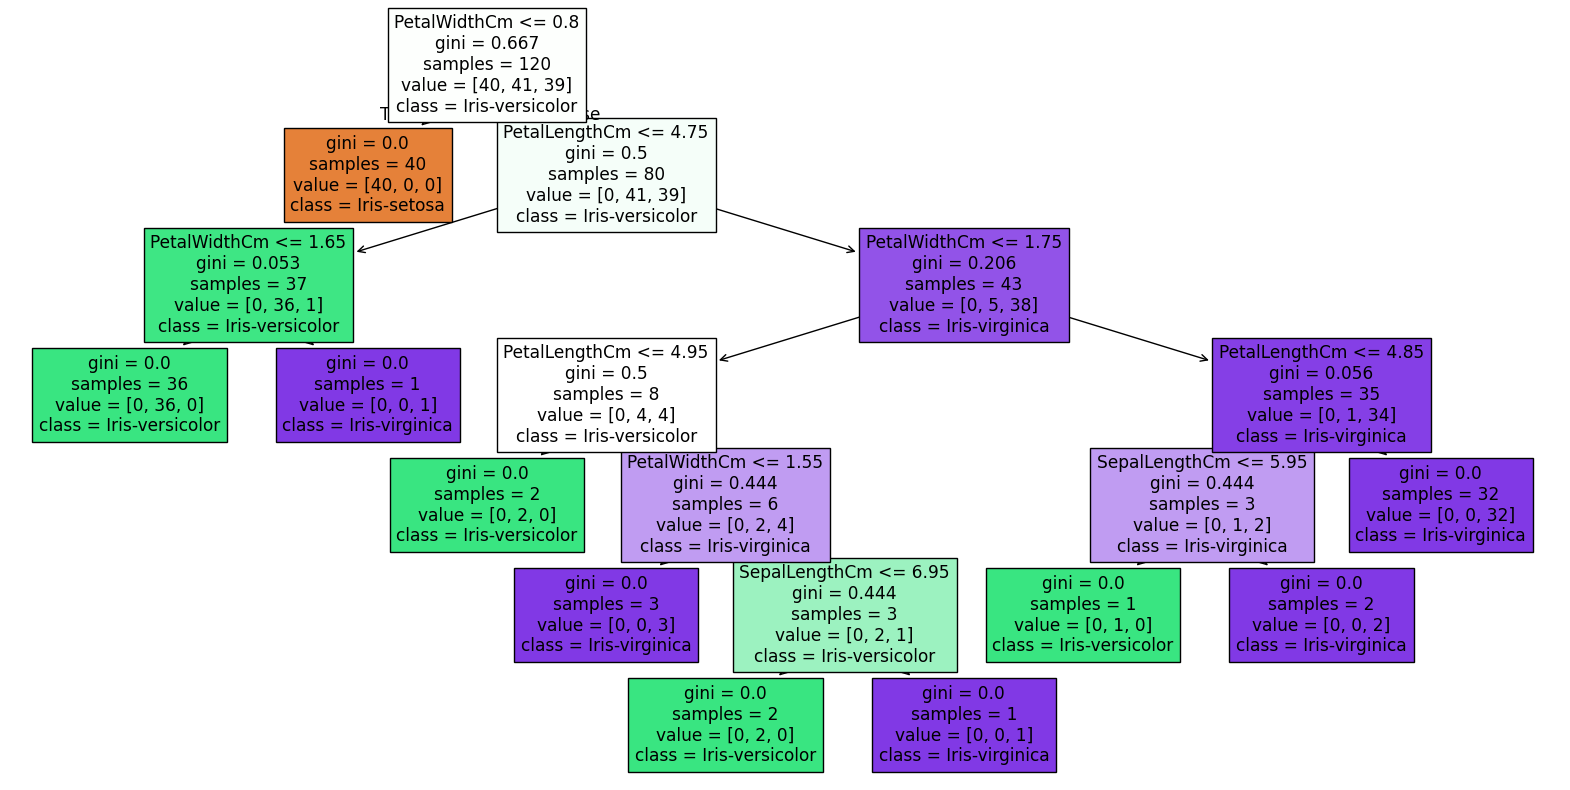

In [45]:
# huh thats very very accurate... lets check the tree out.. 
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], filled=True)
plt.show()